In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simulations
from functools import partial
import os

In [2]:
results_path = os.getcwd() + '/figures/'

## Our model (sum of exponents multiplied by velocity)

Current version of our model without wind is:
$$\dot{v_{i}}=A_{i}\Big[1-\frac{v_{i}}{V_{i}}-\frac{v_{i}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]$$

### Situation 1: each drone starts with its' optimal velocity, drones are sorted according to their maximal velocities. Each drone has the same K=1 and A=0.5.

In [2]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([5,4,3,2,1])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [3]:
t, v = simulations.euler(initial_time=0, end_time=8, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,5,4,3,2,1]), derivative=d)

/tmp/ipykernel_13588/2566908489.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_13588/2566908489.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'sym1.png', dpi=400)
/home/basia/myvirtualenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


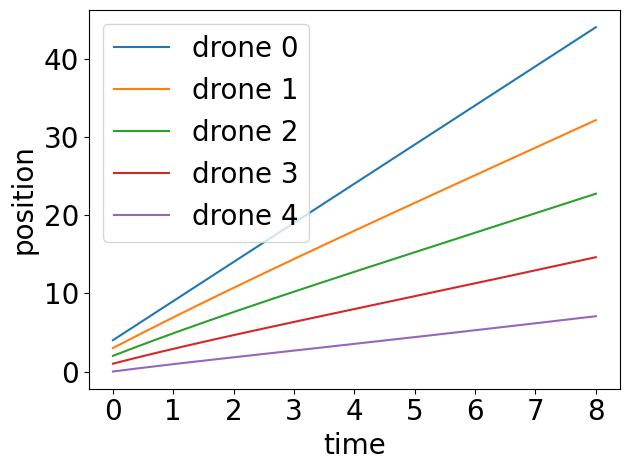

In [15]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'sym1.png', dpi=400)

### Situation 2: each drone starts with its' maximal velocity, but drones are not sorted according to their maximal velocities. Each drone has the same K=1 and A=0.5.

In [23]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [24]:
t, v = simulations.euler(initial_time=0, end_time=8, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

/tmp/ipykernel_13588/852787972.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_13588/852787972.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'sym2.png', dpi=400)


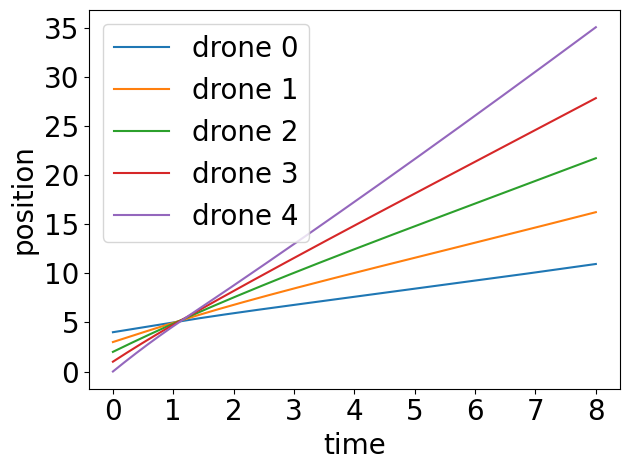

In [25]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'sym2.png', dpi=400)

### Situation 4: first drone has K>>kappa and is very slow.

In [6]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

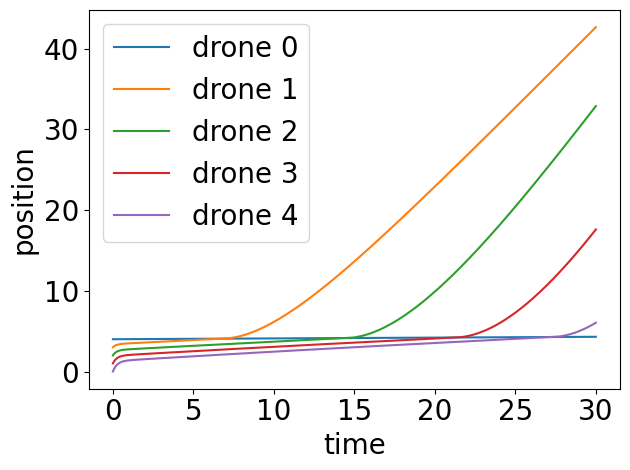

In [8]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'sym4.png', dpi=400)

### Situation 3: several drones have the same starting position and zero velocity, they are the same except for maximum acceleration.

In [31]:
A = np.array([10,5,1,0.5,0.1])
opt = np.array([30,30,30,30,30])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [32]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([0,0,0,0,0,0,0,0,0,0]), derivative=d)

/tmp/ipykernel_13588/3549037712.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


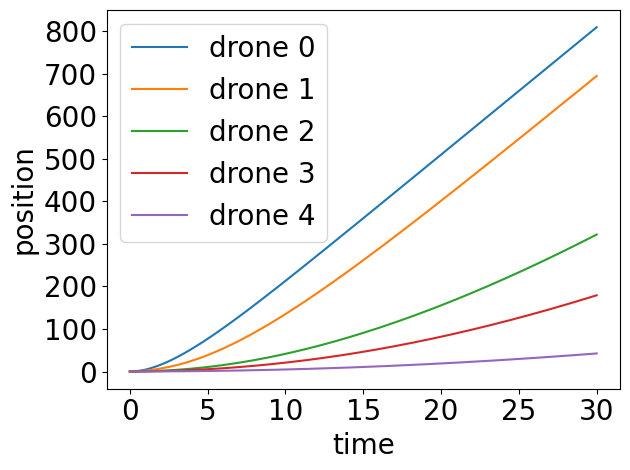

In [33]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'sym3.png', dpi=400)

### Situation 5: some complicated situation with lots of overtaking.

In [17]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [18]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

<IPython.core.display.Javascript object>


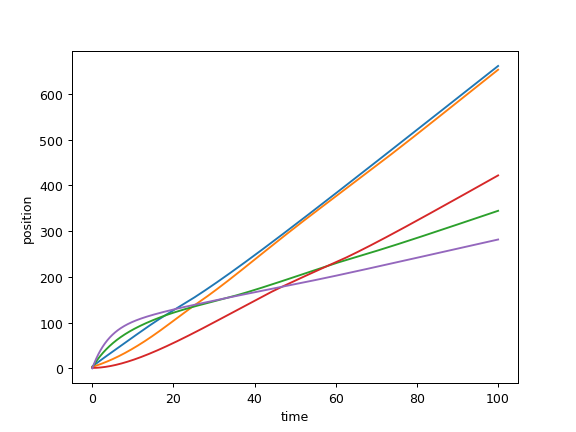

In [19]:
for i in range(5):
    plt.plot(t, v[:,i])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 6: ,,stationary'' state

In [3]:
from textwrap import wrap

In [4]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,2,2,2])
kap = 10
K=np.array([50,50,50,50,50])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [5]:
t, v = simulations.euler(initial_time=0, end_time=200, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,2,2,2]), derivative=d)

/tmp/ipykernel_8134/1200518651.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_8134/1200518651.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'st_st_1.png', dpi=400)
/home/basia/myvirtualenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


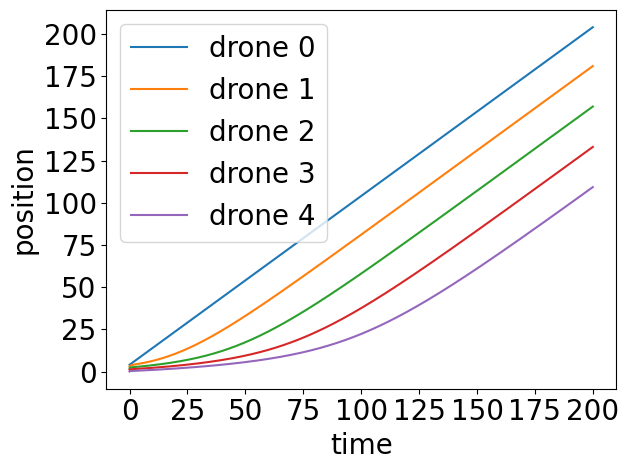

In [6]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'st_st_1.png', dpi=400)

In [7]:
from textwrap import wrap

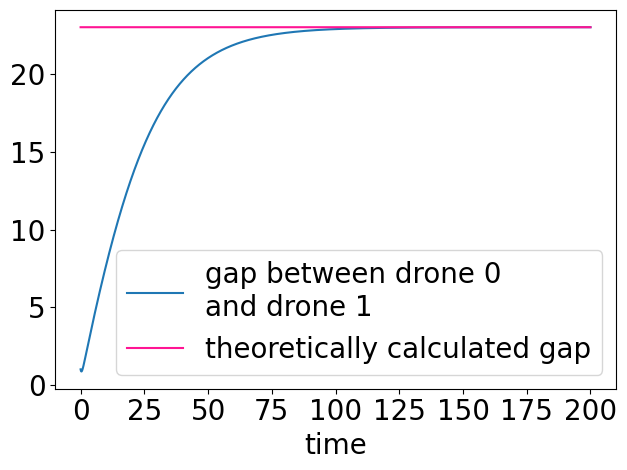

In [8]:
fig, ax = plt.subplots()
ax.plot(t,v[:,0]-v[:,1], label='\n'.join(wrap('gap between drone 0 and drone 1',20)))
plt.plot(t,om*np.log((opt[0]/kap)*K[0]*np.exp((v[:,0]-v[:,0])/om)/(1-opt[0]/opt[1])), color='deeppink', label='theoretically calculated gap')
leg = ax.legend(fontsize=20)
plt.xlabel('time',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'st_st_2.png', dpi=400)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25')])

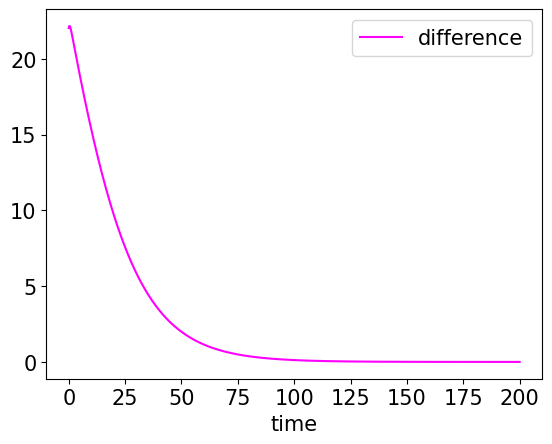

In [9]:
fig, ax = plt.subplots()
plt.plot(t,om*np.log((opt[0]/kap)*K[0]*np.exp((v[:,0]-v[:,0])/om)/(1-opt[0]/opt[1]))-v[:,0]+v[:,1], color='fuchsia', label='\n'.join(wrap('difference',20)))
leg = ax.legend(fontsize=15)
plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
#np.unique(om*np.log((opt[0]/kap)*K[0]*np.exp((v[:,0]-v[:,0])/om)/(1-opt[0]/opt[1])))

/tmp/ipykernel_12553/2855388018.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_12553/2855388018.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'st_st_1_plus_gap.png', dpi=400)


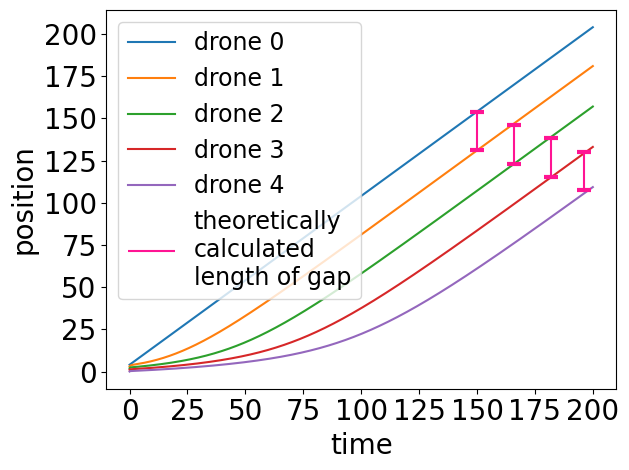

In [16]:
include_gap_length = True

for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))

    # if i in [0,1]:
    #     plt.plot(t, v[:,i], label = 'drone ' + str(i))
    # else:
    #     plt.plot(t, v[:,i])

if include_gap_length:
    gap = om*np.log((opt[0]/kap)*K[0]*np.exp((v[:,0]-v[:,0])/om)/(1-opt[0]/opt[1]))[0]
    plt.vlines(x=150, ymin=v[750000,1], ymax=v[750000,1]+gap, color="deeppink", label='\n'.join(wrap('theoretically calculated length of gap', 15)))
    plt.hlines(y=v[750000,1]+gap, xmin=150-3, xmax=150+3, color="deeppink", linewidth=3) 
    plt.hlines(y=v[750000,1], xmin=150-3, xmax=150+3, color="deeppink", linewidth=3) 
    
    plt.vlines(x=166, ymin=v[830000,2], ymax=v[830000,2]+gap, color="deeppink")
    plt.hlines(y=v[830000,2]+gap, xmin=166-3, xmax=166+3, color="deeppink", linewidth=3) 
    plt.hlines(y=v[830000,2], xmin=166-3, xmax=166+3, color="deeppink", linewidth=3) 

    plt.vlines(x=182, ymin=v[910000,3], ymax=v[910000,3]+gap, color="deeppink")
    plt.hlines(y=v[910000,3]+gap, xmin=182-3, xmax=182+3, color="deeppink", linewidth=3) 
    plt.hlines(y=v[910000,3], xmin=182-3, xmax=182+3, color="deeppink", linewidth=3) 

    plt.vlines(x=196, ymin=v[990000,4], ymax=v[990000,4]+gap, color="deeppink")
    plt.hlines(y=v[990000,4]+gap, xmin=196-3, xmax=196+3, color="deeppink", linewidth=3) 
    plt.hlines(y=v[990000,4], xmin=196-3, xmax=196+3, color="deeppink", linewidth=3) 
    
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=17)
plt.tight_layout()
plt.savefig(results_path + 'st_st_1_plus_gap.png', dpi=400)

In [27]:
# import visualisations
# visualisations.visualise(t,v)

### Situation 7: every static obstacle will be passed by a moving vehicle in finite time.

In [41]:
A = np.array([0.5,0])
opt = np.array([1,1e-10])
kap = 10
K=np.array([1,100])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [42]:
t, v = simulations.euler(initial_time=0, end_time=50, number_of_points=1000000, initial_value=np.array([0,5,1,0]), derivative=d)

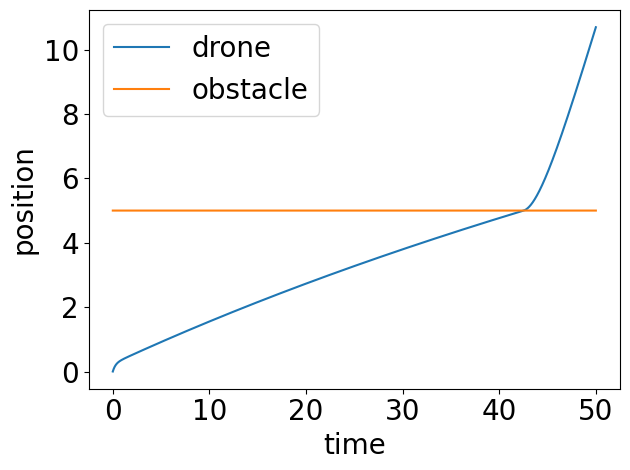

In [43]:
fig, ax = plt.subplots()
ax.plot(t,v[:,0], label='drone')
plt.plot(t, v[:,1], label='obstacle')
leg = ax.legend(fontsize=20)
plt.xlabel('time',fontsize=20)
plt.ylabel('position',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'obstacle.png', dpi=400)

In [12]:
import visualisations

<IPython.core.display.Javascript object>


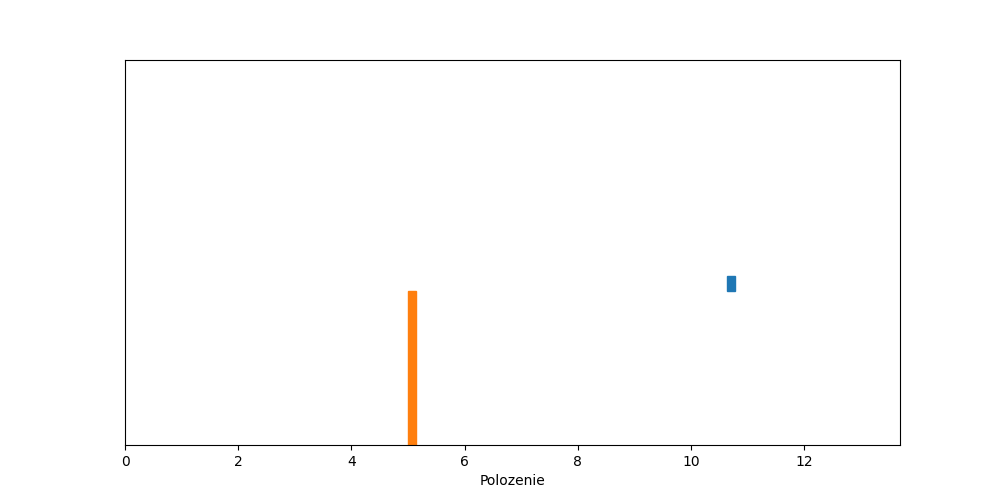

In [13]:
import visualisations
visualisations.visualise(t, v, filename='obstacle',drone_height=[2,0],drone_radius=[0.2,2],heightmax=5)

### Situation 8: 100 drones

In [44]:
A = np.concatenate([np.array([0,0,0,0,0]), np.repeat(4, 100)])

In [45]:
A = np.concatenate([np.array([0,0,0,0,0]), np.repeat(4, 100)])
opt = np.repeat(10, 105)
kap = 10
K = np.concatenate([np.array([100,100,100,100,100]), np.repeat(1, 100)])
om = 30
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [46]:
initial_positions = np.concatenate([np.array([270, 220, 170, 120, 70]), np.linspace(30, 0, 100)])
initial_velocities = np.concatenate([np.array([0, 0, 0, 0, 0]), np.repeat(10, 100)])
initial_value = np.concatenate([initial_positions, initial_velocities])

In [47]:
t, v = simulations.euler(initial_time=0, end_time=1400, number_of_points=1000000, initial_value=initial_value, derivative=d)
#around 15 minutes

/tmp/ipykernel_13588/3632252925.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_13588/3632252925.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'macro4.png', dpi=400)


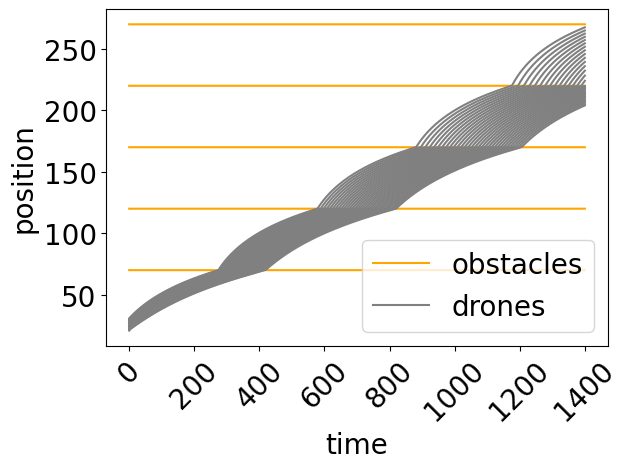

In [49]:
# obstacles
plt.plot(t, v[:,0], color='orange', label='obstacles')
for i in range(1, 5):
    plt.plot(t, v[:,i], color='orange')
    
# drones
plt.plot(t, v[:,5], color='grey', label='drones')
for i in range(6, 36):
    plt.plot(t, v[:,i], color='grey')
    
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("time", fontsize=20)
plt.ylabel("position", fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'macro4.png', dpi=400)

### Situation 9: passing can occur even if blocking potential is positive

We would like to show that it's possible to observe passing even if the blocking potential is positive, i.e.:

$$P_{0} = \frac{1}{V_{1}}-\frac{1}{V_{0}}+\frac{K_{0}}{\kappa} > 0$$

Let's set:

In [50]:
whatever=1

A = np.array([whatever, 2])
opt = np.array([3, 4])
kap = 1
K=np.array([0.6, whatever])
om = 4
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

initial_velocity = np.array([whatever,4])
initial_value = np.concatenate([np.array([0.1, 0]), initial_velocity])

Then we get:

$$P_{0} = \frac{1}{V_{1}}-\frac{1}{V_{0}}+\frac{K_{0}}{\kappa} =  \frac{1}{3}-\frac{1}{4}+\frac{6}{10} > 0$$

In [51]:
t, v = simulations.euler(initial_time=0, end_time=0.1, number_of_points=1000000, initial_value=initial_value, derivative=d)

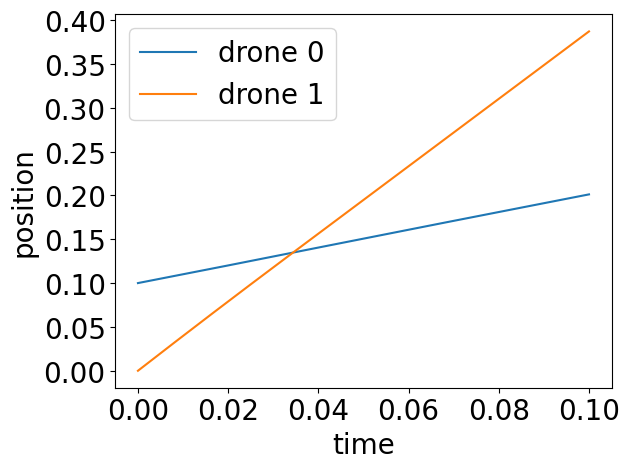

In [53]:
for i in range(2):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time", fontsize=20)
plt.ylabel("position", fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'positive_potential_and_passing.png', dpi=400)

### Stuation 10: almost the same as 9b, but different initial conditions

In [54]:
whatever=1

A = np.array([whatever, 2])
opt = np.array([3, 4])
kap = 1
K=np.array([0.6, whatever])
om = 4
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

initial_velocity = np.array([3, 0])
initial_value = np.concatenate([np.array([0.1, 0]), initial_velocity])

In [55]:
t, v = simulations.euler(initial_time=0, end_time=15, number_of_points=1000000, initial_value=initial_value, derivative=d)

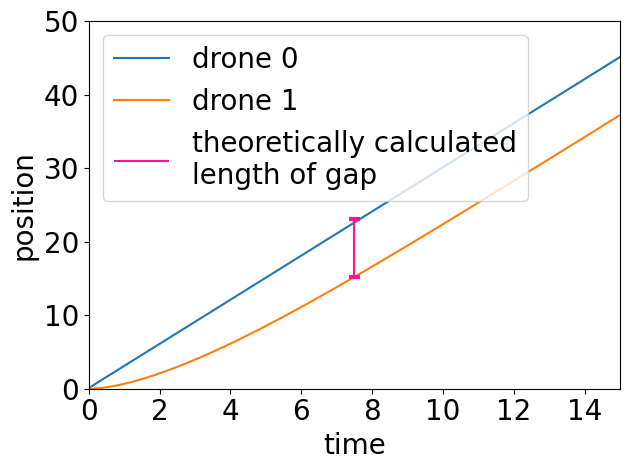

In [59]:
gap = om*np.log((opt[0]/kap)*K[0]*np.exp((initial_velocity[0]-initial_velocity[0])/om)/(1-opt[0]/opt[1]))

for i in range(2):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))

plt.vlines(x=7.5, ymin=v[500000,1], ymax=v[500000,1]+gap, color="deeppink", label='\n'.join(wrap('theoretically calculated length of gap', 27)))
plt.hlines(y=v[500000,1]+gap, xmin=7.5-0.15, xmax=7.5+0.15, color="deeppink", linewidth=3) 
plt.hlines(y=v[500000,1], xmin=7.5-0.15, xmax=7.5+0.15, color="deeppink", linewidth=3) 

plt.xlim(0,15)
plt.ylim(0,50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'positive_potential_no_passing.png', dpi=400)

## Version with wind added

We simply add a component modelling wind-induced acceleration
$$\dot{v_{i}}=A_{i}\Big[1-\frac{v_{i}}{V_{i}}-\frac{v_{i}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]+\frac{H_{i}}{m_{i}},$$
where $H_{i}$ is wind force for $i$-th drone. To compute this wind force we can use a formula:
$$H_{i}=\pm\frac{1}{2}\rho C_{d} A_{f}v^{2}_{wind}.$$

### Situation 1: each drone flies with its' optimal velocity, the fastest starts as the last one. In the first part of simulation (t<10) wind-induced acceleration equals -0.01, in the second part: -1.5.

In [3]:
A = np.array([2,2,2,2,2])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
change_time=10
wind_force=[-0.01,-1.5]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om, model=simulations.model3, wind_function=wrapped, m=m)

In [4]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


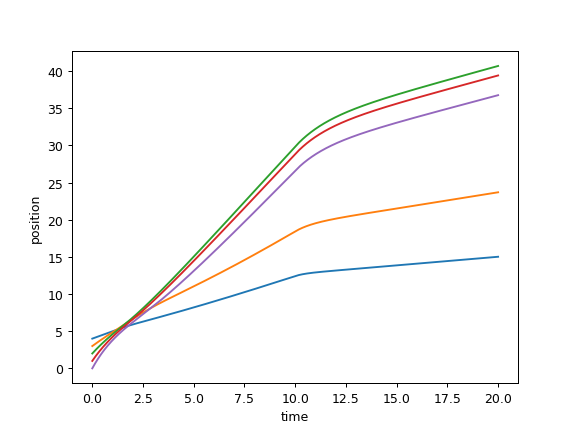

In [5]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 2: First drone has K>>kappa and is very slow. The others are faster and try to overtake. In the first part of simulation (t<5) wind-induced acceleration equals 1 and in the second part: -0.25.

$\textbf{Edit:}$ this situation doesn't make much sense, because the function modelling wind force is not continuous and we can't be guaranteed that the solution exists.

In [6]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
change_time=5
wind_force=[1,-0.25]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=35, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


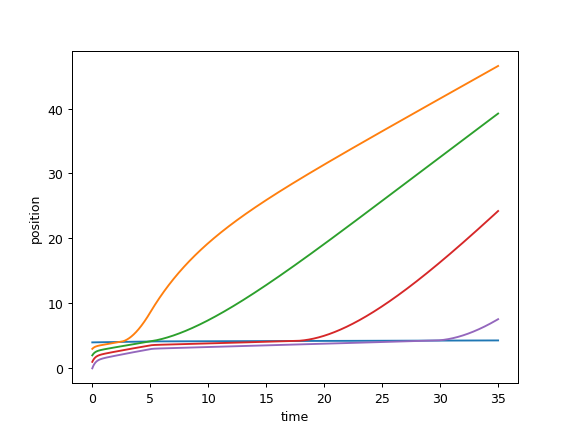

In [8]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 3: when wind blows, drones can be faster than their optimal velocity.

(Here we have a constant wind force, so the solution exists.)

In [60]:
A = np.array([0.5])
opt = np.array([3])
kap = 10
K=np.array([1])
om = 10
wind_force=5
m=np.array([1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [61]:
t, v = simulations.euler(initial_time=0, end_time=5, number_of_points=1000000, initial_value=np.array([10,3]), derivative=d)

In [62]:
from textwrap import wrap

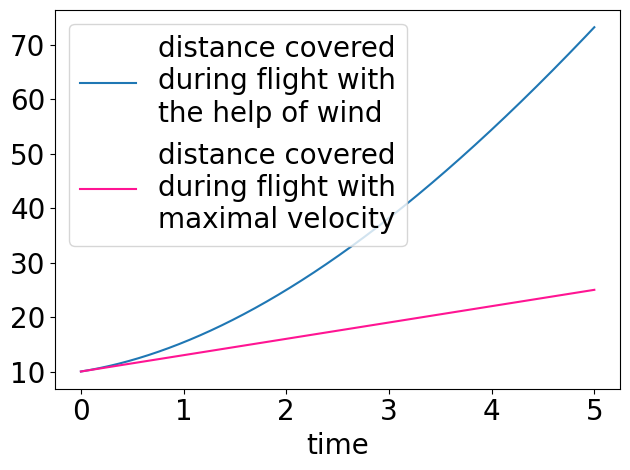

In [64]:
# plt.plot(t,v[:,0])
# plt.xlabel("time")
# plt.ylabel("position")
# plt.show()
fig, ax = plt.subplots()
ax.plot(t, v[:,0], label='\n'.join(wrap('distance covered during flight with the help of wind', 20)))
ax.plot(t, v[0,0]+opt[0]*t, color='deeppink', label='\n'.join(wrap('distance covered during flight with maximal velocity',20)))
leg = ax.legend(fontsize=20);
plt.xlabel('time',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'max_vel.png', dpi=400)

### Situation 4: when wind blows, drones can have negative velocity.

(Here we have a constant wind force, so the solution exists.)

In [13]:
A = np.array([0.5])
opt = np.array([4])
kap = 10
K=np.array([1])
om = 10
wind_force=-6
m=np.array([1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3,m=m)

In [14]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([10,4]), derivative=d)

<IPython.core.display.Javascript object>


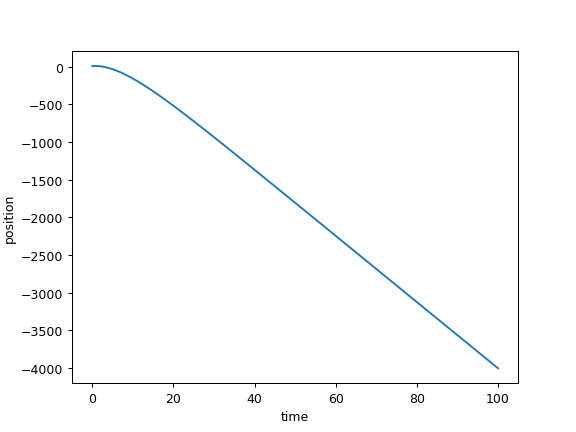

In [15]:
plt.plot(t,v[:,0])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 5: negative velocity

In [65]:
A = np.array([2,4,9])
opt = np.array([4,4,4])
kap = 10
K=np.array([1,1,1])
om = 10
wind_force=-6
m=np.array([1,1,1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3,m=m)

In [66]:
t, v = simulations.euler(initial_time=0, end_time=5, number_of_points=1000000, initial_value=np.array([2,1,0,4,4,4]), derivative=d)

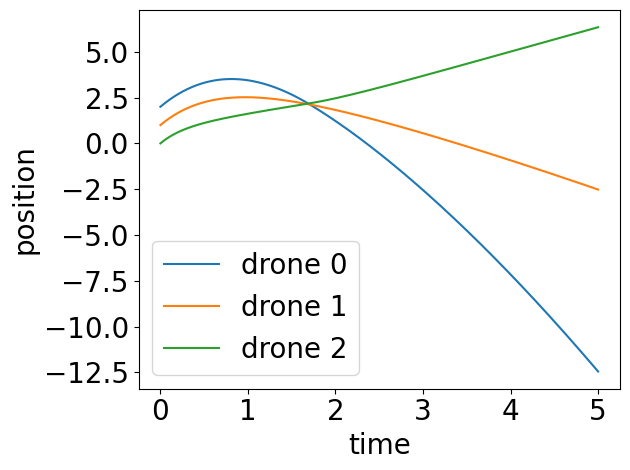

In [67]:
for i in range(3):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'neg_vel2.png', dpi=400)

In [19]:
# import visualisations
# visualisations.visualise(t, v, filename='wind3',drone_height=[1,2,3],drone_radius=[0.4,0.4,0.4],heightmax=5)

### Situation 6: wind changes direction

In [10]:
A = np.array([2])
opt = np.array([1])
kap = 10
K=np.array([1])
om = 10
change_time=[5, 10]
wind_force=[0, 5, -10]
m = np.array([1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om, model=simulations.model3, wind_function=wrapped, m=m)

In [11]:
t, v = simulations.euler(initial_time=0, end_time=15, number_of_points=1000000, initial_value=np.array([0,1]), derivative=d)

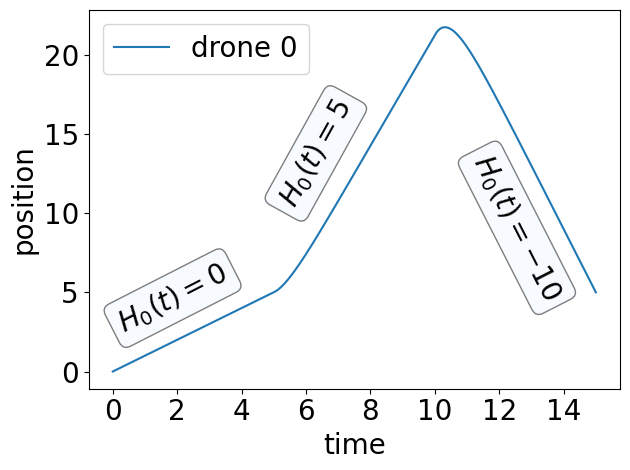

In [87]:
plt.plot(t, v[:,0], label = 'drone ' + str(0))
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)


text1 = '$H_0(t)=0$'
text2 = '$H_0(t)=5$'
text3 = '$H_0(t)=-10$'


props = dict(boxstyle='round', facecolor='aliceblue', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0, 7.2, text1, fontsize=20,
        verticalalignment='top', bbox=props, rotation=27)
plt.text(5, 17.5, text2, fontsize=20,
        verticalalignment='top', bbox=props, rotation=61)
plt.text(11, 14, text3, fontsize=20,
        verticalalignment='top', bbox=props, rotation=-63)

plt.tight_layout()
plt.savefig(results_path + 'neg_vel3.png', dpi=400)

In [25]:
###